# Libraries

In [3]:
from os import walk
from scipy import misc
import matplotlib.pyplot as plt
import random
import numpy as np

# List of training images

In [4]:
lof = []
for (dirpath, dirnames, filenames) in walk('train'):
    lof.extend(filenames)
    break

In [5]:
cat_set = [fn for fn in lof if fn[0:3].lower()=='cat']

In [6]:
dog_set = [fn for fn in lof if fn[0:3].lower()=='dog']

#### Randomly separate original training set into 2 parts:
* training and
* validation

In [7]:
cat_indx = range(0, len(cat_set))
train_cat_indx = random.sample(cat_indx, int(len(cat_set)/100*80))
val_cat_indx = [ite for ite in cat_indx if ite not in train_cat_indx]

dog_indx = range(0, len(dog_set))
train_dog_indx = random.sample(dog_indx, int(len(dog_set)/100*80))
val_dog_indx = [ite for ite in dog_indx if ite not in train_dog_indx]

#### Plot a sample

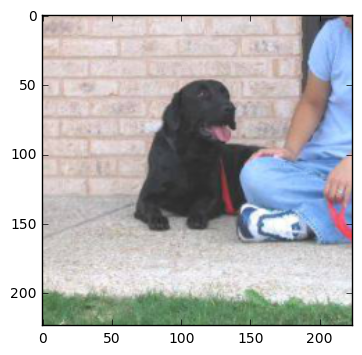

In [10]:
img = misc.imread('train/' + dog_set[train_dog_indx[0]])
img = misc.imresize(img, [224, 224, 3])
plt.imshow(img)
plt.show()

# Create training set

In [11]:
trainingset = np.zeros((len(train_cat_indx) + len(train_dog_indx), 224*224*3), dtype=np.uint8)
trainingset_labels = np.zeros((len(train_cat_indx) + len(train_dog_indx), 2), dtype=np.uint8)
np.shape(trainingset)

(20000, 150528)

In [12]:
curr_indx = 0

# Cat images
for i in train_cat_indx:
    if curr_indx % 500 == 0:
        print('> processed %d images...' % curr_indx)
    
    img = misc.imread('train/' + cat_set[i])
    
    img = misc.imresize(img, [224, 224, 3])
    img = img.reshape(1, -1)
    
    trainingset[curr_indx, :] = img
    
    trainingset_labels[curr_indx, :] = np.array([0, 1])
    
    curr_indx += 1
    
# Dog images
for i in train_dog_indx:
    if curr_indx % 500 == 0:
        print('> processed %d images...' % curr_indx)
        
    img = misc.imread('train/' + dog_set[i])
    
    img = misc.imresize(img, [224, 224, 3])
    img = img.reshape(1, -1)
    
    trainingset[curr_indx, :] = img
    
    trainingset_labels[curr_indx, :] = np.array([1, 0])
    
    curr_indx += 1

print('**** training images processing completed ****')

> processed 0 images...
> processed 500 images...
> processed 1000 images...
> processed 1500 images...
> processed 2000 images...
> processed 2500 images...
> processed 3000 images...
> processed 3500 images...
> processed 4000 images...
> processed 4500 images...
> processed 5000 images...
> processed 5500 images...
> processed 6000 images...
> processed 6500 images...
> processed 7000 images...
> processed 7500 images...
> processed 8000 images...
> processed 8500 images...
> processed 9000 images...
> processed 9500 images...
> processed 10000 images...
> processed 10500 images...
> processed 11000 images...
> processed 11500 images...
> processed 12000 images...
> processed 12500 images...
> processed 13000 images...
> processed 13500 images...
> processed 14000 images...
> processed 14500 images...
> processed 15000 images...
> processed 15500 images...
> processed 16000 images...
> processed 16500 images...
> processed 17000 images...
> processed 17500 images...
> processed 1800

# Create validation set

In [13]:
valset = np.zeros((len(val_cat_indx) + len(val_dog_indx), 224*224*3), dtype=np.uint8)
valset_labels = np.zeros((len(val_cat_indx) + len(val_dog_indx), 2), dtype=np.uint8)
np.shape(valset)

(5000, 150528)

In [14]:
curr_indx = 0

# Cat images
for i in val_cat_indx:
    if curr_indx % 500 == 0:
        print('> processed %d images...' % curr_indx)
    
    img = misc.imread('train/' + cat_set[i])
    
    img = misc.imresize(img, [224, 224, 3])
    img = img.reshape(1, -1)
    
    valset[curr_indx, :] = img
    
    valset_labels[curr_indx, :] = np.array([0, 1])
    
    curr_indx += 1
    
# Dog images
for i in val_dog_indx:
    if curr_indx % 500 == 0:
        print('> processed %d images...' % curr_indx)
        
    img = misc.imread('train/' + dog_set[i])
    
    img = misc.imresize(img, [224, 224, 3])
    img = img.reshape(1, -1)
    
    valset[curr_indx, :] = img
    
    valset_labels[curr_indx, :] = np.array([1, 0])
    
    curr_indx += 1

print('**** validation images processing completed ****')

> processed 0 images...
> processed 500 images...
> processed 1000 images...
> processed 1500 images...
> processed 2000 images...
> processed 2500 images...
> processed 3000 images...
> processed 3500 images...
> processed 4000 images...
> processed 4500 images...
**** validation images processing completed ****


#### Plot a sample before saving generated data to npy files

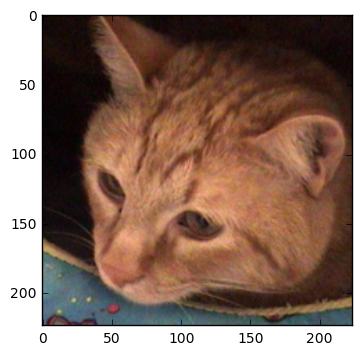

In [18]:
se_indx = random.sample(range(0, len(trainingset)), 1)
rand_train_img = trainingset[se_indx, :]

rand_train_img = rand_train_img.reshape([224, 224, 3])
plt.imshow(rand_train_img)
plt.show()

# Save training and validation sets to npy files

In [ ]:
np.save('training_data.npy', trainingset)
np.save('training_labels.npy', trainingset_labels)

np.save('val_data.npy', valset)
np.save('val_labels.npy', valset_labels)